In [1]:
using PyPlot, LinearAlgebra, JLD2

include("compute_OT.jl")
include("code/Mixed_Wasserstein.jl")
include("code/Sinkhorn.jl")
include("code/sinkhorn_uot.jl")

matplotlib.rcParams["text.usetex"] = true

true

# Section 1

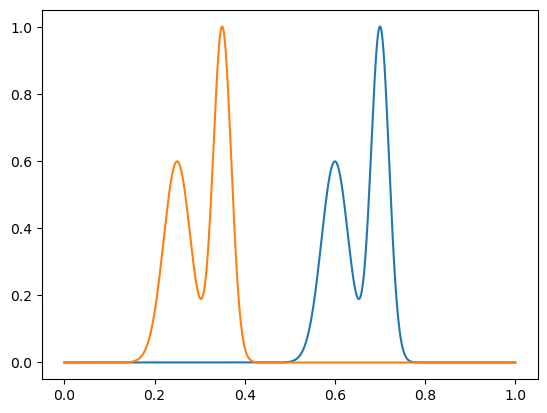

In [2]:
Nt = 1001
t = range(0, step=1e-3, length=Nt)

double_gauss(t0) = 0.6gauss_func(t, t0, 0.03) + gauss_func(t,t0+0.1,0.02)

a = double_gauss(0.6)
b = double_gauss(0.25)

plot(t,a,t,b);

In [3]:
# eps = 1e-3 will cause NaN gradient
eps = 2e-3
M = cost_matrix_1d(t,t)

shift_time = range(0.25, step=2e-3, stop=0.6)
obj_ot = zeros(length(shift_time))
obj_l2 = zeros(length(shift_time))

@time for i = 1:length(shift_time)
    a = double_gauss(shift_time[i])
    TT, gg, dist = sinkhorn_1d_TP(a, b, eps, M; threshold=1e-5, iter_num=0, verbose=false)
    obj_ot[i] = dist
    obj_l2[i] = norm(a-b,2)
end

 28.537299 seconds (4.16 M allocations: 4.347 GiB, 2.44% gc time)


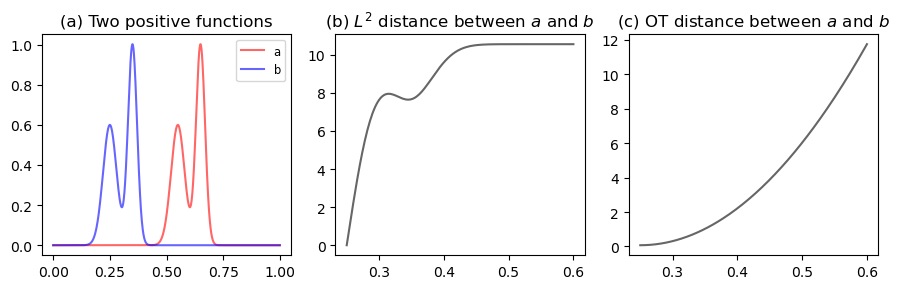

In [4]:

figure(figsize=(9,3))

subplot(131)
a = double_gauss(0.55)
b = double_gauss(0.25)
plot(t,a,color="r",alpha=0.6)
plot(t,b,color="b",alpha=0.6)
title("(a) Two positive functions")
legend(["a", "b"], loc=1, fontsize="small")

subplot(132)
plot(shift_time, obj_l2, color="k",alpha=0.6)
title(L"(b) $L^2$ distance between $a$ and $b$")

subplot(133)
plot(shift_time, obj_ot, color="k",alpha=0.6)
title(L"(c) OT distance between $a$ and $b$")

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_1/images/ch1_1.pdf")

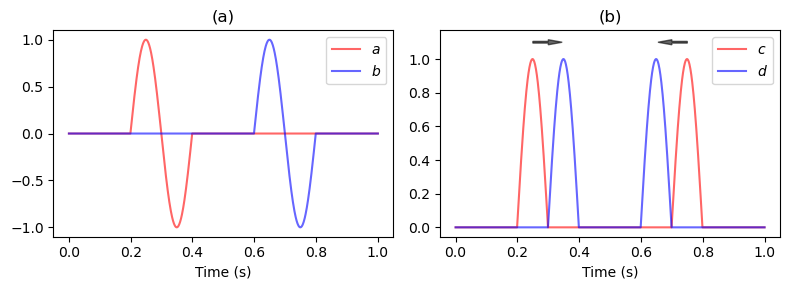

In [5]:
t0 = range(0, step=1e-3, stop=0.2)
sin1 = sin.(2*pi*5*t0)

a = zeros(Nt)
b = zeros(Nt)
a[200:400] .= sin1
b[600:800] .= sin1

ap = a[findall(x->x>=0,a)]
an = a[findall(x->x<0,a)]
bp = b[findall(x->x>=0,b)]
bn = b[findall(x->x<0,b)]

# aa = ap - bn
# bb = bp - an

aa = zeros(Nt)
aa[findall(x->x>=0,a)] .= a[findall(x->x>=0,a)]
aa[findall(x->x<0,b)] .= -1 * b[findall(x->x<0,b)]
bb = zeros(Nt)
bb[findall(x->x>=0,b)] .= b[findall(x->x>=0,b)]
bb[findall(x->x<0,a)] .= -1 * a[findall(x->x<0,a)]

figure(figsize=(8,3))
subplot(121)
plot(t,a,color="r",alpha=0.6)
plot(t,b,color="b",alpha=0.6)
xlabel("Time (s)")
legend([L"$a$", L"$b$"])
title("(a)")

subplot(122)
plot(t,aa,color="r",alpha=0.6)
plot(t,bb,color="b",alpha=0.6)
xlabel("Time (s)")
arrow(0.25, 1.1, 0.05, 0, width=0.01, color="k", alpha=0.6)
arrow(0.75, 1.1, -0.05, 0, width=0.01, color="k", alpha=0.6)
title("(b)")
legend([L"$c$", L"$d$"])

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section1_1.pdf")
# plot(t, aa, t, bb)


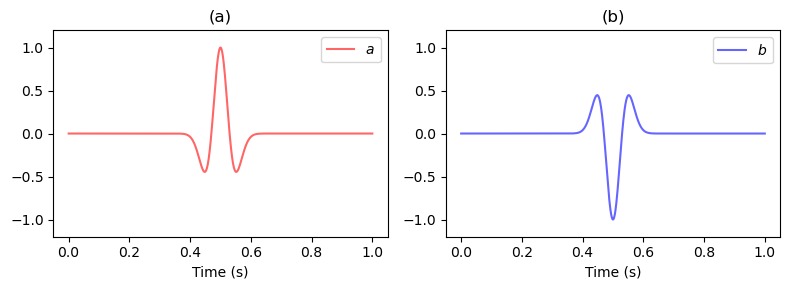

In [6]:
a = ricker_func(t, 0.5, 0.03)
b = -ricker_func(t, 0.5, 0.03)

figure(figsize=(8,3))
subplot(121)
plot(t,a,color="r",alpha=0.6)
xlabel("Time (s)")
ylim(-1.2,1.2)
legend([L"$a$"])
title("(a)")

subplot(122)
plot(t,b,color="b",alpha=0.6)
xlabel("Time (s)")
ylim(-1.2,1.2)
legend([L"$b$"])
title("(b)")

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section1_2.pdf")

# Section 2

## Shift ricker example

In [7]:
function normal_max_min(f)
    f = f .- minimum(f)
    f = f ./ maximum(f)
    return f
end

normal_max_min (generic function with 1 method)

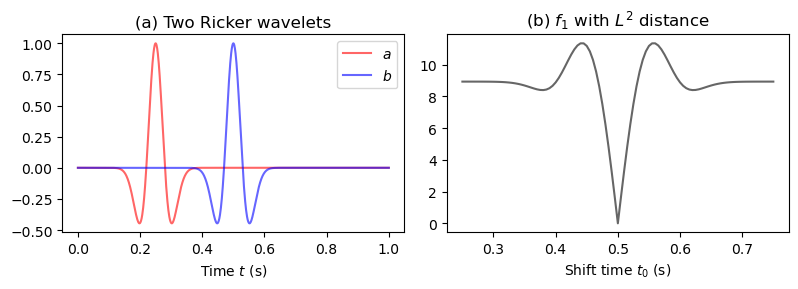

In [8]:
@load "ch4_data/shift_ricker_plus.jld2"
a = ricker_func(t, 0.25, 0.03)
b = ricker_func(t, 0.5, 0.03)

figure(figsize=(8,3))

subplot(121)
plot(t,a,color="r",alpha=0.6)
plot(t,b,color="b",alpha=0.6)
xlabel(L"Time $t$ (s)")
title("(a) Two Ricker wavelets")
legend([L"$a$", L"$b$"])

subplot(122)
plot(shift_time, dist_l2, color="k", alpha=0.6) 
xlabel(L"Shift time $t_0$ (s)")
title(L"(b) $f_1$ with $L^2$ distance")

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_1.pdf")

In [9]:
minimum(a)

-0.44625922005057694

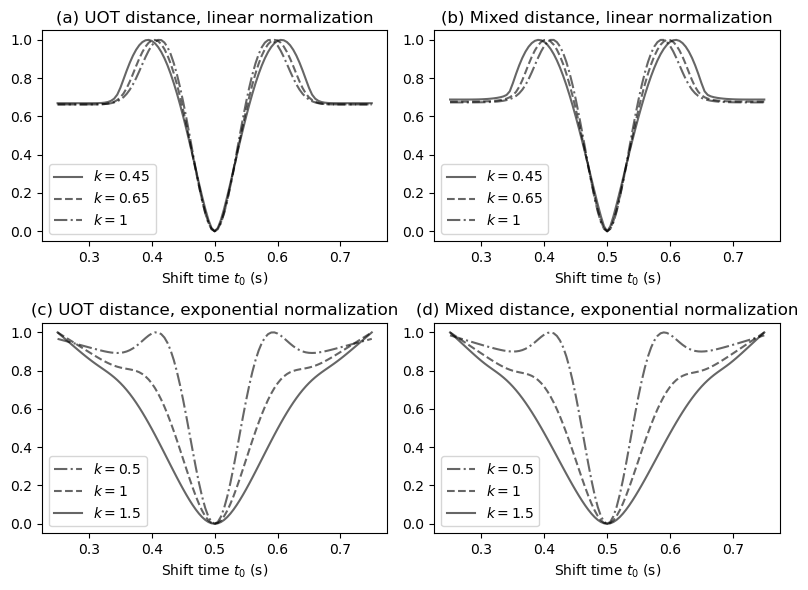

0.45
0.65
1
0.5
1
1.5


In [10]:
@load "ch4_data/shift_ricker_plus.jld2"
println(k1)
println(k2)
println(k3)
@load "ch4_data/shift_ricker_exp.jld2"
println(k1)
println(k2)
println(k3)

figure(figsize=(8,6))

subplot(221)
plot(shift_time, normal_max_min(dist_uot_plus1), color="k", alpha=0.6, "-")
plot(shift_time, normal_max_min(dist_uot_plus2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_uot_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Shift time $t_0$ (s)")
title("(a) UOT distance, linear normalization")
legend([L"k=0.45", L"k=0.65", L"k=1"])

subplot(222)
plot(shift_time, normal_max_min(dist_mixed_plus1), color="k", alpha=0.6, "-")
plot(shift_time, normal_max_min(dist_mixed_plus2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_mixed_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Shift time $t_0$ (s)")
title("(b) Mixed distance, linear normalization")
legend([L"k=0.45", L"k=0.65", L"k=1"])

subplot(223)
plot(shift_time, normal_max_min(dist_uot_exp1), color="k", alpha=0.6, "-.")
plot(shift_time, normal_max_min(dist_uot_exp2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_uot_exp3), color="k", alpha=0.6, "-")
xlabel(L"Shift time $t_0$ (s)")
title("(c) UOT distance, exponential normalization")
legend([L"k=0.5", L"k=1", L"k=1.5"])

subplot(224)
plot(shift_time, normal_max_min(dist_mixed_exp1), color="k", alpha=0.6, "-.")
plot(shift_time, normal_max_min(dist_mixed_exp2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_mixed_exp3), color="k", alpha=0.6, "-")
xlabel(L"Shift time $t_0$ (s)")
title("(d) Mixed distance, exponential normalization")
legend([L"k=0.5", L"k=1", L"k=1.5"])

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_4/images/ch4_section2_2.pdf")



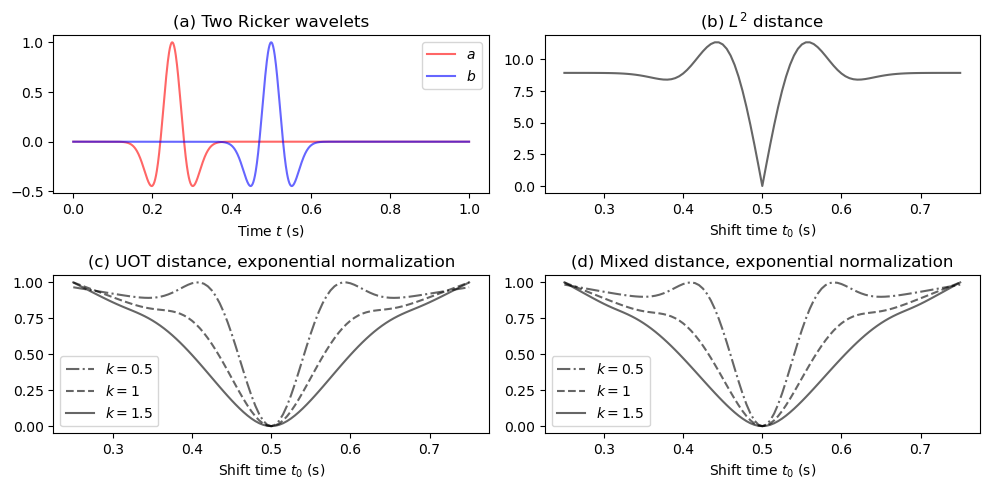

0.45
0.65
1
0.5
1
1.5


In [18]:
# For slides
@load "ch4_data/shift_ricker_plus.jld2"
println(k1)
println(k2)
println(k3)
@load "ch4_data/shift_ricker_exp.jld2"
println(k1)
println(k2)
println(k3)

a = ricker_func(t, 0.25, 0.03)
b = ricker_func(t, 0.5, 0.03)

figure(figsize=(10,5))

subplot(221)
plot(t,a,color="r",alpha=0.6)
plot(t,b,color="b",alpha=0.6)
xlabel(L"Time $t$ (s)")
title("(a) Two Ricker wavelets")
legend([L"$a$", L"$b$"])

subplot(222)
plot(shift_time, dist_l2, color="k", alpha=0.6) 
xlabel(L"Shift time $t_0$ (s)")
title(L"(b) $L^2$ distance")

subplot(223)
plot(shift_time, normal_max_min(dist_uot_exp1), color="k", alpha=0.6, "-.")
plot(shift_time, normal_max_min(dist_uot_exp2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_uot_exp3), color="k", alpha=0.6, "-")
xlabel(L"Shift time $t_0$ (s)")
title("(c) UOT distance, exponential normalization")
legend([L"k=0.5", L"k=1", L"k=1.5"])

subplot(224)
plot(shift_time, normal_max_min(dist_mixed_exp1), color="k", alpha=0.6, "-.")
plot(shift_time, normal_max_min(dist_mixed_exp2), color="k", alpha=0.6, "--")
plot(shift_time, normal_max_min(dist_mixed_exp3), color="k", alpha=0.6, "-")
xlabel(L"Shift time $t_0$ (s)")
title("(d) Mixed distance, exponential normalization")
legend([L"k=0.5", L"k=1", L"k=1.5"])

tight_layout()
savefig("/Users/lida/Desktop/PhD_defense/slides/images/normalizations.pdf")




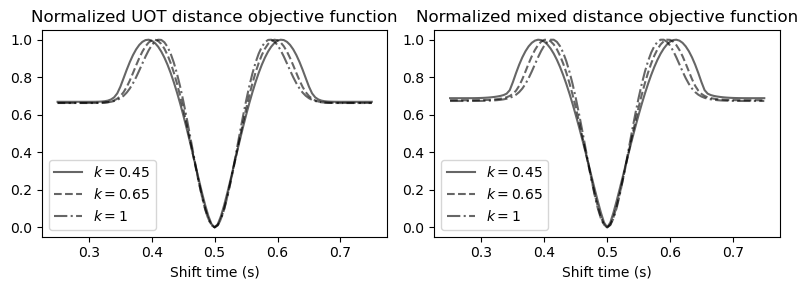

In [9]:
# @load "ch4_data/shift_ricker_plus.jld2"

# figure(figsize=(8,3))

# subplot(121)
# plot(shift_time, normal_max_min(dist_uot_plus1), color="k", alpha=0.6, "-")
# plot(shift_time, normal_max_min(dist_uot_plus2), color="k", alpha=0.6, "--")
# plot(shift_time, normal_max_min(dist_uot_plus3), color="k", alpha=0.6, "-.")
# xlabel("Shift time (s)")
# title("Normalized UOT distance objective function")
# legend([L"k=0.45", L"k=0.65", L"k=1"])

# subplot(122)
# plot(shift_time, normal_max_min(dist_mixed_plus1), color="k", alpha=0.6, "-")
# plot(shift_time, normal_max_min(dist_mixed_plus2), color="k", alpha=0.6, "--")
# plot(shift_time, normal_max_min(dist_mixed_plus3), color="k", alpha=0.6, "-.")
# xlabel("Shift time (s)")
# title("Normalized mixed distance objective function")
# legend([L"k=0.45", L"k=0.65", L"k=1"])

# tight_layout()
# savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_2.pdf")

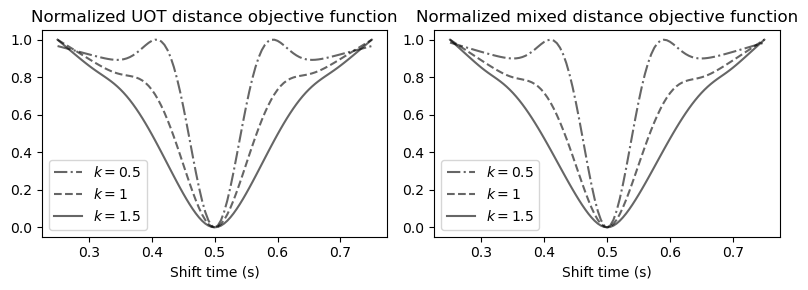

In [10]:
# @load "ch4_data/shift_ricker_exp.jld2"

# figure(figsize=(8,3))

# subplot(121)
# plot(shift_time, normal_max_min(dist_uot_exp1), color="k", alpha=0.6, "-.")
# plot(shift_time, normal_max_min(dist_uot_exp2), color="k", alpha=0.6, "--")
# plot(shift_time, normal_max_min(dist_uot_exp3), color="k", alpha=0.6, "-")
# xlabel("Shift time (s)")
# title("Normalized UOT distance objective function")
# legend([L"k=0.5", L"k=1", L"k=1.5"])

# subplot(122)
# plot(shift_time, normal_max_min(dist_mixed_exp1), color="k", alpha=0.6, "-.")
# plot(shift_time, normal_max_min(dist_mixed_exp2), color="k", alpha=0.6, "--")
# plot(shift_time, normal_max_min(dist_mixed_exp3), color="k", alpha=0.6, "-")
# xlabel("Shift time (s)")
# title("Normalized mixed distance objective function")
# legend([L"k=0.5", L"k=1", L"k=1.5"])

# tight_layout()
# savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_3.pdf")

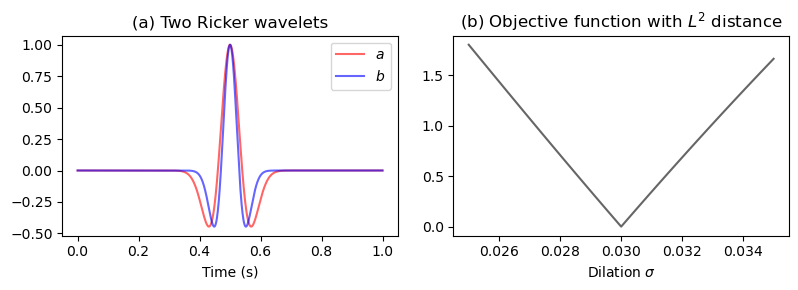

In [16]:
@load "ch4_data/dilation_add.jld2"

a = ricker_func(t, 0.5, 0.04)
b = ricker_func(t, 0.5, 0.03)

figure(figsize=(8,3))

subplot(121)
plot(t,a,color="r",alpha=0.6)
plot(t,b,color="b",alpha=0.6)
xlabel("Time (s)")
title("(a) Two Ricker wavelets")
legend([L"$a$", L"$b$"])

subplot(122)
plot(shift_sigma, dist_dilation_l2, color="k", alpha=0.6) 
xlabel(L"Dilation $\sigma$")
title(L"(b) Objective function with $L^2$ distance")

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_3.pdf")

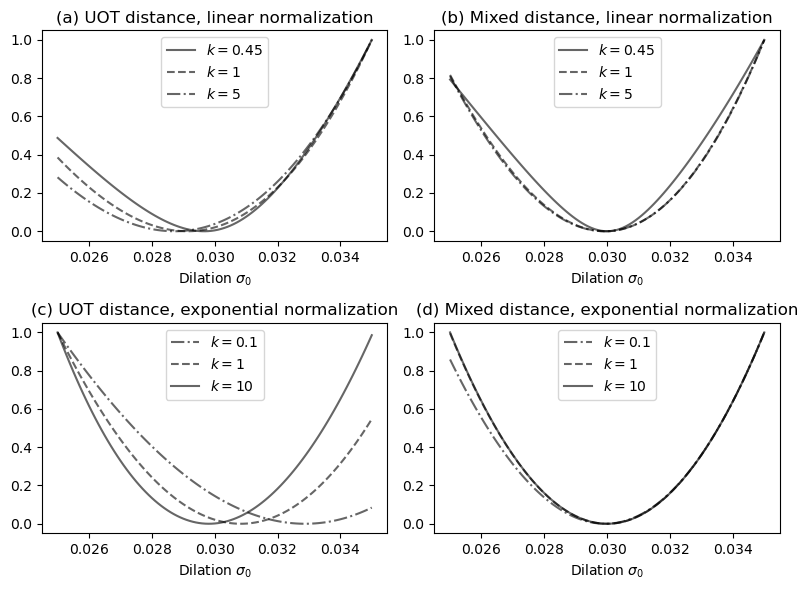

0.45
1
5
0.1
1
10


In [20]:
@load "ch4_data/dilation_add.jld2"
println(k1)
println(k2)
println(k3)
@load "ch4_data/dilation_exp.jld2"
println(k1)
println(k2)
println(k3)

figure(figsize=(8,6))

subplot(221)
plot(shift_sigma, normal_max_min(dist_uot_plus1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_uot_plus2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_uot_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma_0$")
title("(a) UOT distance, linear normalization")
legend([L"k=0.45", L"k=1", L"k=5"], loc=9)

subplot(222)
plot(shift_sigma, normal_max_min(dist_mixed_plus1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_mixed_plus2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_mixed_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma_0$")
title("(b) Mixed distance, linear normalization")
legend([L"k=0.45", L"k=1", L"k=5"])

subplot(223)
plot(shift_sigma, normal_max_min(dist_uot_exp1), color="k", alpha=0.6, "-.")
plot(shift_sigma, normal_max_min(dist_uot_exp2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_uot_exp3), color="k", alpha=0.6, "-")
xlabel(L"Dilation $\sigma_0$")
title("(c) UOT distance, exponential normalization")
legend([L"k=0.1", L"k=1", L"k=10"])

subplot(224)
plot(shift_sigma, normal_max_min(dist_mixed_exp1), color="k", alpha=0.6, "-.")
plot(shift_sigma, normal_max_min(dist_mixed_exp2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_mixed_exp3), color="k", alpha=0.6, "-")
xlabel(L"Dilation $\sigma_0$")
title("(d) Mixed distance, exponential normalization")
legend([L"k=0.1", L"k=1", L"k=10"])


tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_4/images/ch4_section2_4.pdf")

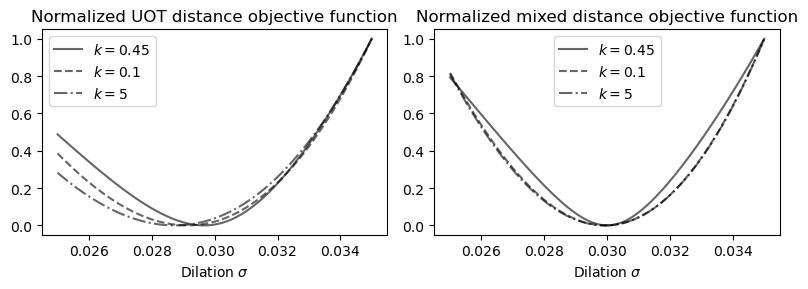

In [12]:
@load "ch4_data/dilation_add.jld2"

figure(figsize=(8,3))

subplot(121)
plot(shift_sigma, normal_max_min(dist_uot_plus1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_uot_plus2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_uot_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma$")
title("Normalized UOT distance objective function")
legend([L"k=0.45", L"k=0.1", L"k=5"])

subplot(122)
plot(shift_sigma, normal_max_min(dist_mixed_plus1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_mixed_plus2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_mixed_plus3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma$")
title("Normalized mixed distance objective function")
legend([L"k=0.45", L"k=0.1", L"k=5"])

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_5.pdf")

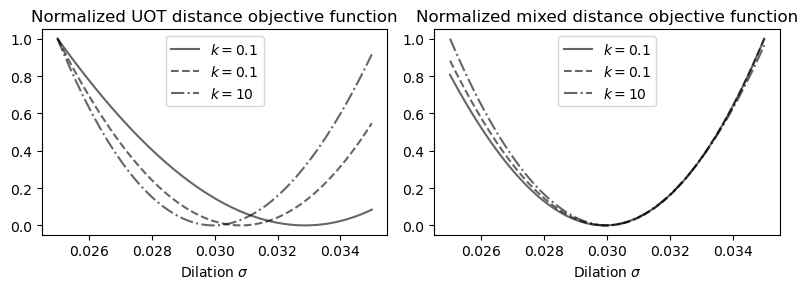

In [13]:
@load "ch4_data/dilation_exp.jld2"

figure(figsize=(8,3))

subplot(121)
plot(shift_sigma, normal_max_min(dist_uot_exp1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_uot_exp2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_uot_exp3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma$")
title("Normalized UOT distance objective function")
legend([L"k=0.1", L"k=0.1", L"k=10"])

subplot(122)
plot(shift_sigma, normal_max_min(dist_mixed_exp1), color="k", alpha=0.6, "-")
plot(shift_sigma, normal_max_min(dist_mixed_exp2), color="k", alpha=0.6, "--")
plot(shift_sigma, normal_max_min(dist_mixed_exp3), color="k", alpha=0.6, "-.")
xlabel(L"Dilation $\sigma$")
title("Normalized mixed distance objective function")
legend([L"k=0.1", L"k=0.1", L"k=10"])

tight_layout()
savefig("/Users/lida/Desktop/PhD_thesis/chapter_6/images/ch4_section2_6.pdf")

# Ex 2

In [565]:
function normal_plus(f,k)
    return f .+ k
    end

function normal_exp(f,k)
    return exp.(k.*f)
end

function normal_sq(f)
    return f.^2
end

normal_sq (generic function with 1 method)

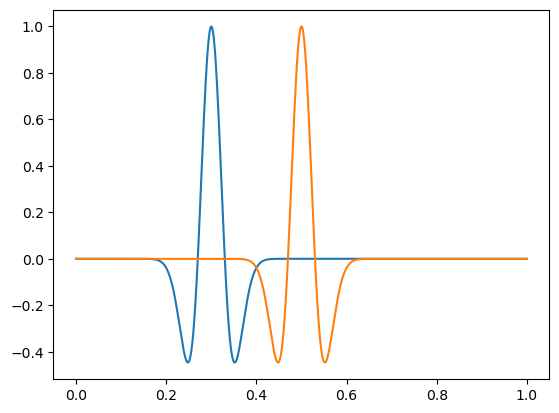

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa58793bcd0>
 PyObject <matplotlib.lines.Line2D object at 0x7fa58793bd00>

In [566]:
a = ricker_func(t, 0.3, 0.03)
b = ricker_func(t, 0.5, 0.03)

plot(t,a,t,b)

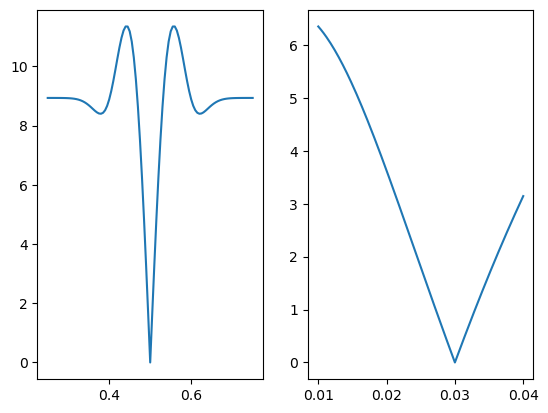

151


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa58729ea30>

In [567]:
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)
dist_l2 = zeros(length(shift_time))
for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    dist_l2[i] = norm(a-b,2)
end

shift_sigma = range(0.01, step=2e-4, stop=0.04)
n = length(shift_sigma)
println(n)

b = ricker_func(t, 0.5, 0.03)
dist_sigma = zeros(length(shift_sigma))
for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    dist_sigma[i] = norm(a-b,2)
end

subplot(121)
plot(shift_time, dist_l2) 
subplot(122)
plot(shift_sigma, dist_sigma)

## Shift UOT and Mixed

In [634]:
a = ricker_func(t, 0.3, 0.03)
b = ricker_func(t, 0.5, 0.03)

k1 = 0.1
k2 = 1
k3 = 5
# a_plus1 = normal_plus(a,k1)
# b_plus1 = normal_plus(b,k1)

a_exp1 = normal_exp(a,k1)
b_exp1 = normal_exp(b,k1)

esp = 1e-3
reg_m = 1e0
iterMax = 500

@time grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)

  0.271747 seconds (2.08 k allocations: 92.552 MiB, 9.88% gc time)


([-0.003830589215881419, -0.003861401947097054, -0.0038909304691112645, -0.0039191966655767185, -0.003946223037550212, -0.003972032703662309, -0.003996649398264829, -0.004020097467367645, -0.004042401862183631, -0.004063588130094553  …  -0.0036968452227947868, -0.0036756793437300317, -0.0036533952100732403, -0.003629967305625925, -0.00360537070954825, -0.0035795811053709325, -0.0035525747874312064, -0.0035243286649220273, -0.003494820263738152, -0.0034640277263024988], 52.64928046412295)

In [635]:
println(minimum(a))
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)

-0.44625922005057694


101

In [636]:
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)
b = ricker_func(t, 0.5, 0.03)

esp = 1e-3
reg_m = 1e0
iterMax = 500

k1 = 0.45
k2 = 0.65
k3 = 1

b_plus1 = normal_plus(b,k1)
b_plus2 = normal_plus(b,k2)
b_plus3 = normal_plus(b,k3)

dist_uot_plus1 = zeros(n)
dist_uot_plus2 = zeros(n)
dist_uot_plus3 = zeros(n)

dist_mixed_plus1 = zeros(n)
dist_mixed_plus2 = zeros(n)
dist_mixed_plus3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    
    a_plus1 = normal_plus(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_plus1, b_plus1, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus1[i] = dist1
    
    a_plus2 = normal_plus(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_plus2, b_plus2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_plus2, b_plus2, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus2[i] = dist2
    
    a_plus3 = normal_plus(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_plus3, b_plus3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_plus3, b_plus3, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/shift_ricker_plus.jld2" shift_time dist_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3 k1 k2 k3


0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
102.087845 seconds (2.01 M allocations: 44.059 GiB, 4.91% gc time)


In [639]:
@save "ch4_data/shift_ricker_plus.jld2" shift_time dist_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3 k1 k2 k3

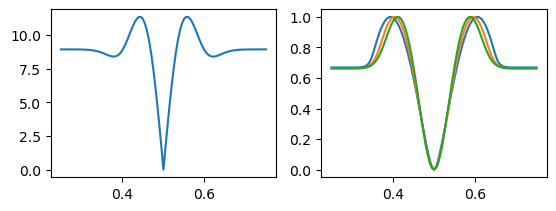

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa573bdfd90>

In [637]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,normal_max_min(dist_uot_plus1))
# subplot(223)
plot(shift_time,normal_max_min(dist_uot_plus2))
# subplot(224)
plot(shift_time,normal_max_min(dist_uot_plus3))

In [572]:
shift_time = range(0.25, step=5e-3, stop=0.75)
n = length(shift_time)
b = ricker_func(t, 0.5, 0.03)

esp = 1e-3
reg_m = 1e0
iterMax = 500
lambda_mix = 1e0

k1 = 0.5
k2 = 1
k3 = 1.5

b_exp1 = normal_exp(b,k1)
b_exp2 = normal_exp(b,k2)
b_exp3 = normal_exp(b,k3)

dist_uot_exp1 = zeros(n)
dist_uot_exp2 = zeros(n)
dist_uot_exp3 = zeros(n)

dist_mixed_exp1 = zeros(n)
dist_mixed_exp2 = zeros(n)
dist_mixed_exp3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, shift_time[i], 0.03)
    
    a_exp1 = normal_exp(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_exp1, b_exp1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_exp1, b_exp1, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp1[i] = dist1
    
    a_exp2 = normal_exp(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_exp2, b_exp2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_exp2, b_exp2, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp2[i] = dist2
    
    a_exp3 = normal_exp(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_exp3, b_exp3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_exp3, b_exp3, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/shift_ricker_exp.jld2" shift_time dist_l2 dist_uot_exp1 dist_uot_exp2 dist_uot_exp3 dist_mixed_exp1 dist_mixed_exp2 dist_mixed_exp3 k1 k2 k3




0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
109.357852 seconds (2.01 M allocations: 44.059 GiB, 4.84% gc time)


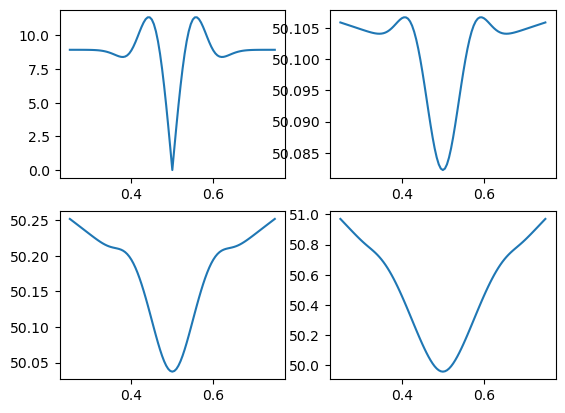

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa58b5c0be0>

In [573]:
subplot(221)
plot(shift_time,dist_l2)
subplot(222)
plot(shift_time,dist_uot_exp1)
subplot(223)
plot(shift_time,dist_uot_exp2)
subplot(224)
plot(shift_time,dist_uot_exp3)

## Dilation UOT and Mixed

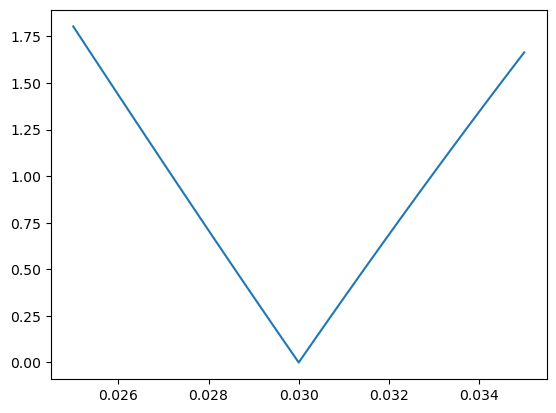

101


In [672]:
shift_sigma = range(0.025, step=1e-4, stop=0.035)
n = length(shift_sigma)

b = ricker_func(t, 0.5, 0.03)
dist_dilation_l2 = zeros(length(shift_sigma))
for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    dist_dilation_l2[i] = norm(a-b,2)
end

plot(shift_sigma, dist_dilation_l2)
println(n)

In [677]:
# linear plus
b = ricker_func(t, 0.5, 0.03)

esp = 1e-3
lambda_mix = 1e0
iterMax = 500

k1 = 0.45
k2 = 1
k3 = 5

b_plus1 = normal_plus(b,k1)
b_plus2 = normal_plus(b,k2)
b_plus3 = normal_plus(b,k3)

dist_uot_plus1 = zeros(n)
dist_uot_plus2 = zeros(n)
dist_uot_plus3 = zeros(n)

dist_mixed_plus1 = zeros(n)
dist_mixed_plus2 = zeros(n)
dist_mixed_plus3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    
    a_plus1 = normal_plus(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_plus1, b_plus1, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus1[i] = dist1
    
    a_plus2 = normal_plus(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_plus2, b_plus2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_plus2, b_plus2, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus2[i] = dist2
    
    a_plus3 = normal_plus(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_plus3, b_plus3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_plus3, b_plus3, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/dilation_add.jld2" shift_sigma dist_dilation_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3 k1 k2 k3

0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
115.707715 seconds (2.01 M allocations: 44.059 GiB, 4.57% gc time)


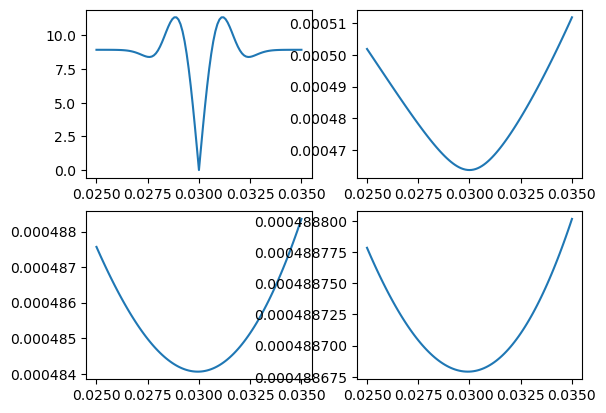

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa58a3518b0>

In [699]:

subplot(221)
plot(shift_sigma,dist_l2)
subplot(222)
plot(shift_sigma,dist_mixed_plus1)
subplot(223)
plot(shift_sigma,dist_mixed_plus2)
subplot(224)
plot(shift_sigma,dist_mixed_plus3)

In [687]:
esp = 1e-3
reg_m = 1e0
iterMax = 500
lambda_mix = 1e-10

k1 = 0.1
k2 = 1
k3 = 5

b_exp1 = normal_exp(b,k1)
b_exp2 = normal_exp(b,k2)
b_exp3 = normal_exp(b,k3)

dist_uot_exp1 = zeros(n)
dist_uot_exp2 = zeros(n)
dist_uot_exp3 = zeros(n)

dist_mixed_exp1 = zeros(n)
dist_mixed_exp2 = zeros(n)
dist_mixed_exp3 = zeros(n)

@time for i = 1:n
    a = ricker_func(t, 0.5, shift_sigma[i])
    
    a_exp1 = normal_exp(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_exp1, b_exp1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_exp1, b_exp1, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp1[i] = dist1
    
    a_exp2 = normal_exp(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_exp2, b_exp2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_exp2, b_exp2, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp2[i] = dist2
    
    a_exp3 = normal_exp(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_exp3, b_exp3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_exp3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_exp3, b_exp3, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_exp3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/dilation_exp.jld2" shift_sigma dist_dilation_l2 dist_uot_exp1 dist_uot_exp2 dist_uot_exp3 dist_mixed_exp1 dist_mixed_exp2 dist_mixed_exp3 k1 k2 k3

0.09900990099009901
0.19801980198019803
0.297029702970297
0.39603960396039606
0.49504950495049505
0.594059405940594
0.693069306930693
0.7920792079207921
0.8910891089108911
0.9900990099009901
106.650846 seconds (2.01 M allocations: 44.060 GiB, 4.79% gc time)


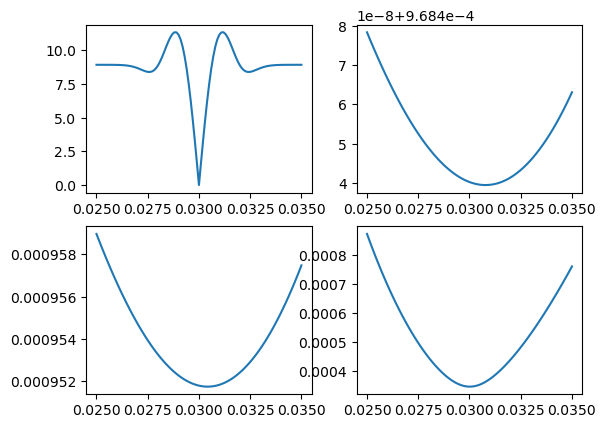

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa579b710a0>

In [688]:
subplot(221)
plot(shift_sigma,dist_l2)
subplot(222)
plot(shift_sigma,dist_mixed_exp1)
subplot(223)
plot(shift_sigma,dist_mixed_exp2)
subplot(224)
plot(shift_sigma,dist_mixed_exp3)

## Amplitude change (Not working, maybe just ignore it)

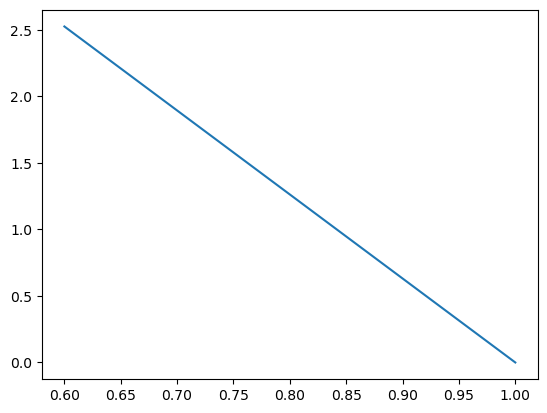

11


In [579]:
shift_amp = range(0.6, step=4e-2, stop=1)
n = length(shift_amp)

b = ricker_func(t, 0.5, 0.03)
dist_l2 = zeros(n)
for i = 1:n
    a = shift_amp[i] * ricker_func(t, 0.5, 0.03)
    dist_l2[i] = norm(a-b,2)
end

plot(shift_amp, dist_l2)
println(n)

In [580]:
# linear plus
b = ricker_func(t, 0.5, 0.03)

esp = 1e-3
lambda_mix = 1e0
iterMax = 500

k1 = 0.5
k2 = 1
k3 = 1.5

b_plus1 = normal_plus(b,k1)
b_plus2 = normal_plus(b,k2)
b_plus3 = normal_plus(b,k3)

dist_uot_plus1 = zeros(n)
dist_uot_plus2 = zeros(n)
dist_uot_plus3 = zeros(n)

dist_mixed_plus1 = zeros(n)
dist_mixed_plus2 = zeros(n)
dist_mixed_plus3 = zeros(n)

@time for i = 1:n
    a = shift_amp[i] *  ricker_func(t, 0.5, 0.03)
    
    a_plus1 = normal_plus(a,k1)
    grad1, dist1 = unbalanced_sinkhorn_1d(a_plus1, b_plus1, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus1[i] = dist1
    grad1, dist1 = Mixed_Wasserstein(a_plus1, b_plus1, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus1[i] = dist1
    
    a_plus2 = normal_plus(a,k2)
    grad2, dist2 = unbalanced_sinkhorn_1d(a_plus2, b_plus2, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus2[i] = dist2
    grad2, dist2 = Mixed_Wasserstein(a_plus2, b_plus2, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus2[i] = dist2
    
    a_plus3 = normal_plus(a,k3)
    grad3, dist3 = unbalanced_sinkhorn_1d(a_plus3, b_plus3, M, esp, reg_m; iterMax=iterMax, verbose=false)
    dist_uot_plus3[i] = dist3
    grad3, dist3 = Mixed_Wasserstein(a_plus3, b_plus3, eps, lambda_mix, M; threshold=1e-5, iter_num=iterMax, verbose=false);
    dist_mixed_plus3[i] = dist3
    
    if rem(i,10) == 0
        println(i/n)
    end
end

@save "ch4_data/amp_change_add.jld2" shift_amp dist_l2 dist_uot_plus1 dist_uot_plus2 dist_uot_plus3 dist_mixed_plus1 dist_mixed_plus2 dist_mixed_plus3

0.9090909090909091
 12.509035 seconds (218.57 k allocations: 4.799 GiB, 4.72% gc time)


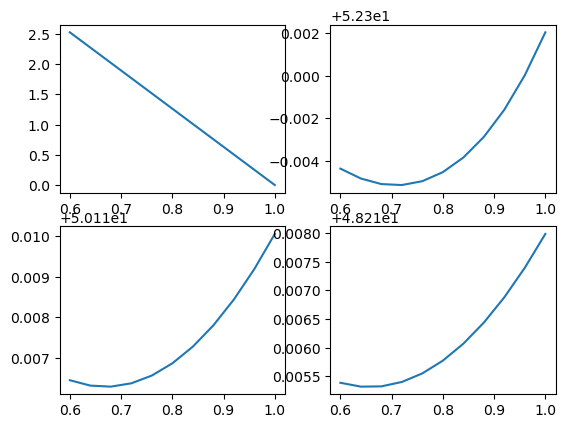

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa589075490>

In [581]:

subplot(221)
plot(shift_amp,dist_l2)
subplot(222)
plot(shift_amp,dist_uot_plus1)
subplot(223)
plot(shift_amp,dist_uot_plus2)
subplot(224)
plot(shift_amp,dist_uot_plus3)

In [582]:
dist_uot_plus1

11-element Array{Float64,1}:
 52.295657357860705
 52.29519534263016
 52.294936504648504
 52.29489132556429
 52.295072285716074
 52.29549433340128
 52.296175510682666
 52.29713780055772
 52.29840830227233
 52.300020941393754
 52.3020192189482